# Programming Exercise 2 : Logistic Regression

In [9]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op

from plotData import plotData
from sigmoid import sigmoid
from plotDecisionBoundary import plotDecisionBoundary
from costFunction import costFunction
from gradient import gradient
from mapFeature import mapFeature
from predict import predict

## 1. Logistic Regression

In [2]:
# Load Data
data = np.loadtxt('C:\\Users\\Karim\\Desktop\\Logistic-Regression\\with-Python\\ex2data1.txt', delimiter =",")

X = data[:, 0:2]
y = data[:, 2]

m = y.size

y = y.reshape((m,1))

#### 1.1 Visualizing the data
We start the exercise by first plotting the data to understand the problem we are working with.

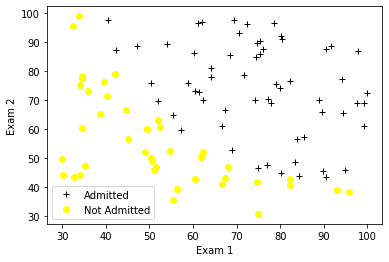

In [3]:
line_pos, line_neg = plotData(X, y, "Exam 1","Exam 2", "Admitted","Not Admitted")

plt.legend(handles=[line_pos,line_neg])

plt.show(block=False)

#### 1.2 Compute Cost and Gradient

In [4]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X = np.c_[np.ones((m, 1)), X]

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y), gradient(initial_theta, X, y)

print("Cost at initial theta (zeros): ", cost, "\n")
print("Expected cost (approx): 0.693\n")
print('Gradient at initial theta (zeros): \n')
print(grad)
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n")

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
cost, grad = costFunction(test_theta, X, y), gradient(test_theta, X, y)

print("\nCost at test theta:", cost, "\n")
print("Expected cost (approx): 0.218\n")
print("Gradient at test theta: \n")
print(grad)
print("Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n")

Cost at initial theta (zeros):  0.6931471805599453 

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: 0.21833019382659774 

Expected cost (approx): 0.218

Gradient at test theta: 

[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



#### 1.3 Optimizing using scipy.optimize (equivalent to fminunc in matlab)

optimal theta [-25.16131851   0.20623159   0.20147148]


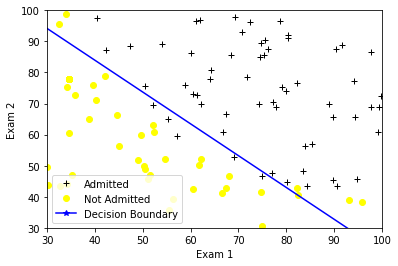

In [5]:
Result = op.minimize(fun = costFunction, x0 = initial_theta, args = (X, y), method = 'TNC', jac = gradient)
optimal_theta = Result.x

print("optimal theta", optimal_theta)

# Plot Boundary
X_base = data[:, 0:2]
line_pos, line_neg = plotData(X_base, y, "Exam 1","Exam 2", "Admitted","Not Admitted")
boundary_line = plotDecisionBoundary(optimal_theta, X, y)
plt.legend(handles=[line_pos,line_neg, boundary_line])
plt.draw()

plt.show(block=False)

#### 1.4 Evaluating logistic regression

After learning the parameters, you'll like to use it to predict the outcomes on unseen data. 

In this part, you will use the logistic regression model to predict the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be admitted.

Furthermore, you will compute the training and test set accuracies of our model.

Predict probability for a student with score 45 on exam 1 and score 85 on exam 2

In [6]:
theta  = optimal_theta

prob = sigmoid(np.dot(np.array([[1, 45, 85]]), theta))
print("For a student with scores 45 and 85, we predict an admission probability of f\n", prob)
print("Expected value: 0.775 +/- 0.002\n\n")

# Compute accuracy on our training set
p = predict(theta, X)
y = y.reshape((m))

print("Train Accuracy: ",np.multiply(np.mean((p == y).astype(int)), 100))
print("Expected accuracy (approx): 89.0\n")
print("\n")

For a student with scores 45 and 85, we predict an admission probability of f
 [0.77629062]
Expected value: 0.775 +/- 0.002


Train Accuracy:  89.0
Expected accuracy (approx): 89.0





## 2. Regularized Logistic Regression

#### 2.1 Visualizing the data

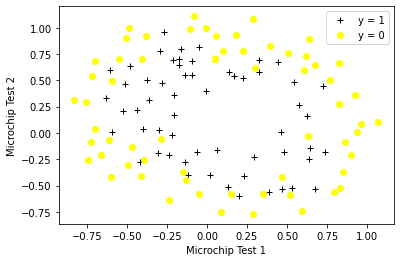

In [7]:
# Load Data
data = np.loadtxt('C:\\Users\\Karim\\Desktop\\Logistic-Regression\\with-Python\\ex2data2.txt', delimiter =",")

X = data[:, 0:2]
y = data[:, 2]

m = y.size

y = y.reshape((m,1))

line_pos, line_neg = plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

plt.legend(handles=[line_pos,line_neg])

plt.show(block=False)

#### 2.2 Feature mapping

In [10]:
# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled

X = mapFeature(X[:,0], X[:,1])

#### 2.3 Compute Cost and Gradient

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
reg_lambda = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunction(initial_theta, X, y, reg_lambda), gradient(initial_theta, X, y, reg_lambda)

print('Cost at initial theta (zeros): \n', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print('\n', grad[0:6])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1],1))
cost, grad = costFunction(test_theta, X, y, 10), gradient(test_theta, X, y, reg_lambda)

print('\nCost at test theta (with lambda = 10): \n', cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print('\n', grad[0:6])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at initial theta (zeros): 
 0.6931471805599454
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:


 [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]
 [3.76648474e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): 
 3.1645093316150095
Expected cost (approx): 3.16

Gradient at test theta - first five values only:


 [[0.34604507]
 [0.08508073]
 [0.11852457]
 [0.1505916 ]
 [0.01591449]
 [0.16811439]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



#### 2.3 Optimizing

In [13]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1 (you should vary this)
reg_lambda = 1

# Optimize
Result = op.minimize(fun = costFunction, x0 = initial_theta, args = (X, y, reg_lambda, True), method = 'TNC', jac = gradient)
optimal_theta = Result.x

print("optimal theta", optimal_theta)

optimal theta [ 1.27271027  0.62529964  1.18111686 -2.01987399 -0.91743189 -1.43166929
  0.12393228 -0.36553117 -0.35725404 -0.17516291 -1.45817009 -0.05098418
 -0.61558553 -0.27469165 -1.19271298 -0.24217841 -0.20603298 -0.04466178
 -0.27778951 -0.29539513 -0.45645981 -1.04319155  0.02779373 -0.29244871
  0.01555761 -0.32742406 -0.1438915  -0.92467487]


#### 2.4 Evaluating regularized logistic regression

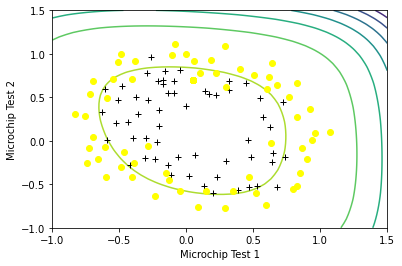

Train Accuracy:  83.05084745762711
Expected accuracy (with lambda = 1): 83.1 (approx)



In [15]:
# Plot Boundary
X_base = data[:, 0:2]
line_pos, line_neg = plotData(X_base, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
boundary_line = plotDecisionBoundary(optimal_theta, X, y)
plt.show(block=False)

theta  = optimal_theta

# Compute accuracy on our training set
p = predict(theta, X)
y = y.reshape((m))

print("Train Accuracy: ",np.multiply(np.mean((p == y).astype(int)), 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')